In [1]:
# MOUNT GOOGLE DRIVE FOR DATASET ACCESS

from google.colab import drive
drive.mount("/content/drive")

# UNMOUNT
# drive.flush_and_unmount()

Mounted at /content/drive


In [2]:
# IMPORTS

# datascience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# ML
import cv2 as cv
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#System
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# DATASET DIRECTORIES

#train_dir = "/content/drive/MyDrive/datasets/emotion_detection/train"
#test_dir = "/content/drive/MyDrive/datasets/emotion_detection/test"

train_dir="/content/drive/MyDrive/CV/train"
test_dir="/content/drive/MyDrive/CV/test"

<================ SAMPLE IMAGES ==================>


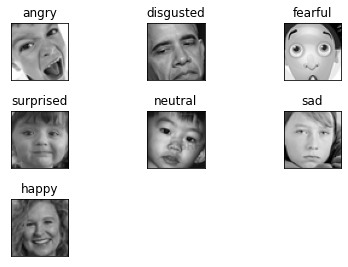

In [4]:
# AVAILABLE CLASSES

emotions= os.listdir(train_dir)
print("<================ SAMPLE IMAGES ==================>")
for i in range(1,len(emotions)+1):
  path=train_dir+f"/{emotions[i-1]}/"
  img = cv.imread(path+os.listdir(path)[0])
  plt.subplot(3,3,i)
  plt.tight_layout()
  plt.imshow(img)
  plt.title(emotions[i-1])
  plt.xticks([])
  plt.yticks([])

In [6]:
# DATASET DISTRIBUTIUON

%%time
print("NUMBER OF IMAGES IN TRAINING DATASET : ")
train_cnt=0
for i in emotions:
    cnt = len(os.listdir(train_dir+f"/{i}/"))
    print(f"{i} : ",cnt)
    train_cnt+=cnt
print("TOTAL : ",train_cnt)
print("\n\nNUMBER OF IMAGES IN TESTING DATASET : ")
test_cnt=0
for i in emotions:
    cnt = len(os.listdir(test_dir+f"/{i}/"))
    print(f"{i} : ",len(os.listdir(test_dir+f"/{i}/")))
    test_cnt+=cnt
print("TOTAL : ",test_cnt)


NUMBER OF IMAGES IN TRAINING DATASET : 
angry :  3995
disgusted :  436
fearful :  4097
surprised :  3171
neutral :  4965
sad :  4830
happy :  7215
TOTAL :  28709


NUMBER OF IMAGES IN TESTING DATASET : 
angry :  958
disgusted :  111
fearful :  1024
surprised :  831
neutral :  1233
sad :  1252
happy :  1774
TOTAL :  7183
CPU times: user 39 ms, sys: 12.5 ms, total: 51.4 ms
Wall time: 541 ms


In [7]:
#IMAGE DATA GENERATIONN

#TRAINING DATA

datagen = ImageDataGenerator(
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        
                                        )
training_dataset = datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48,48),
                                                    batch_size = 32,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical"
                                                   )
datagen = ImageDataGenerator(rescale = 1./255,
                                        )
testing_dataset = datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (48,48),
                                                              batch_size = 32,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                             )

Found 28709 images belonging to 7 classes.
Found 7183 images belonging to 7 classes.


In [8]:
#MODEL
model= Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 

model.add(Dense(100,activation = 'relu'))

model.add(Dense(50,activation = 'relu'))

model.add(Dense(225,activation = 'relu'))

model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

In [9]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.005), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [10]:
#TRAINING
history = model.fit(
    training_dataset ,
    epochs=1,
    batch_size=32)

898/898 [==============================] - 6910s 8s/step - loss: 1.8724 - accuracy: 0.2391


In [11]:
#TESTING

model.evaluate(testing_dataset)

225/225 [==============================] - 1798s 8s/step - loss: 1.8211 - accuracy: 0.2609


[1.821070909500122, 0.2608937621116638]

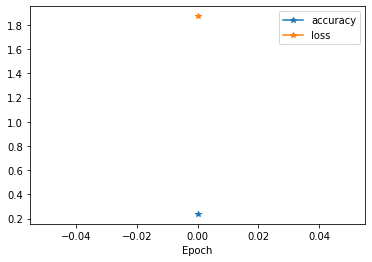

In [12]:
# MODEL EVALUATION

train_acc = history.history['accuracy']
train_loss = history.history['loss']

plt.plot(train_acc,marker="*",label="Acc Value")
plt.plot(train_loss,marker="*",label="loss Value")
plt.grid(False)

plt.xlabel("Epoch")
plt.ylabel("")
plt.legend(["accuracy","loss"])
plt.show()

In [13]:
#SAVING MODEL

model.save("emotion_detection_model.h5")